In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Import Data

In [3]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
sample_submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')



warnings.filterwarnings(action='ignore') 

In [4]:
submission_id = test['PassengerId'] 
submission_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

# Data Preprocessing

In [5]:
print('train_shape : ',train.shape)

df = pd.merge(train,test, how = 'outer')
full_index = df['PassengerId']

train_shape :  (8693, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [7]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
for _ in df.columns.tolist():
    if df[_].dtype == 'object':
        print(df[_].value_counts())
        print('*'*40)

0001_01    1
9227_03    1
9220_01    1
9220_02    1
9220_03    1
          ..
4610_01    1
4611_01    1
4612_01    1
4613_01    1
9277_01    1
Name: PassengerId, Length: 12970, dtype: int64
****************************************
Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64
****************************************
False    8079
True     4581
Name: CryoSleep, dtype: int64
****************************************
G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64
****************************************
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64
****************************************
False    12401
True       273
Name: VIP, dtype: int64
****************************************
Carry Contrevins      2
Dawne Jacobbinson     2
Gabria Batestonley    2
Loree Wolfer

### Change data type

* boolean -> numeric

In [9]:
df['CryoSleep'] = df['CryoSleep'].map({True:1,
                                 False:0})
df['VIP'] = df['VIP'].map({True:1,
                           False:0})
df['Transported'] = df['Transported'].map({True:1,
                                 False:0})

df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1.0,G/1496/S,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,0.0,NaN,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,1.0,D/296/P,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,0.0,D/297/P,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


### Create a new column using only the information required by the cabin

In [10]:
df['Cabin']

0           B/0/P
1           F/0/S
2           A/0/S
3           A/0/S
4           F/1/S
           ...   
12965    G/1496/S
12966         NaN
12967     D/296/P
12968     D/297/P
12969    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [11]:
df['cabin'] = df['Cabin'].str[0]
df['side'] = df['Cabin'].str[-1]

df = df.drop('Cabin',axis = 1)
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin,side
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,B,P
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,F,S
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,A,S
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,A,S
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1.0,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
12966,9269_01,Earth,0.0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
12967,9271_01,Mars,1.0,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
12968,9273_01,Europa,0.0,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


### Create Derived Variables
### From full name to last name.

In [12]:
df['Name']= df['Name'].str.split(' ').str[1]

df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin,side
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Ofracculy,0.0,B,P
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Vines,1.0,F,S
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Susent,0.0,A,S
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Susent,0.0,A,S
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Santantines,1.0,F,S


**PassengerId **- A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

### we can guess the number of families on board with PassengerId.

In [13]:
df['id'] = [i[0] for i in df['PassengerId'].str.split('_')]
df['member'] = [i[1] for i in df['PassengerId'].str.split('_')]

In [14]:
gggg = df.groupby('id').count()['member'].index.tolist()
pp = df.groupby('id').count()['member'].values.tolist()

df['FamilySize'] = 0

for ID,member in zip(gggg,pp):
    df.loc[df['id'] == ID,'FamilySize']= member 
    
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin,side,id,member,FamilySize
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Ofracculy,0.0,B,P,0001,01,1
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Vines,1.0,F,S,0002,01,1
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Susent,0.0,A,S,0003,01,2
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Susent,0.0,A,S,0003,02,2
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Santantines,1.0,F,S,0004,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1.0,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Peter,NaN,G,S,9266,02,2
12966,9269_01,Earth,0.0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Scheron,NaN,NaN,NaN,9269,01,1
12967,9271_01,Mars,1.0,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Pore,NaN,D,P,9271,01,1
12968,9273_01,Europa,0.0,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,Conale,NaN,D,P,9273,01,1


### Remove unnecessary variables

In [15]:
df = df.drop(['PassengerId','id','member'], axis = 1)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin,side,FamilySize
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Ofracculy,0.0,B,P,1
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Vines,1.0,F,S,1
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Susent,0.0,A,S,2
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Susent,0.0,A,S,2
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Santantines,1.0,F,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,1.0,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Peter,NaN,G,S,2
12966,Earth,0.0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Scheron,NaN,NaN,NaN,1
12967,Mars,1.0,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Pore,NaN,D,P,1
12968,Europa,0.0,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,Conale,NaN,D,P,1


### proceed with EDA together to fill in the missing values.


### The missing values are processed through a variety of information, but the information that will be the criteria is filled by guessing the highest frequency value.

In [16]:
df.isna().sum()

HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
cabin            299
side             299
FamilySize         0
dtype: int64

![](https://opgg-com-image.akamaized.net/attach/images/20190711151531.633036.jpeg)


### There are too many missing values.




# Fill Missing Values

### The Homeplanet, destination, and VIP presence will be filled with missing values through the highest frequency value.

HomePlanet         0
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
cabin            299
side             299
FamilySize         0
dtype: int64

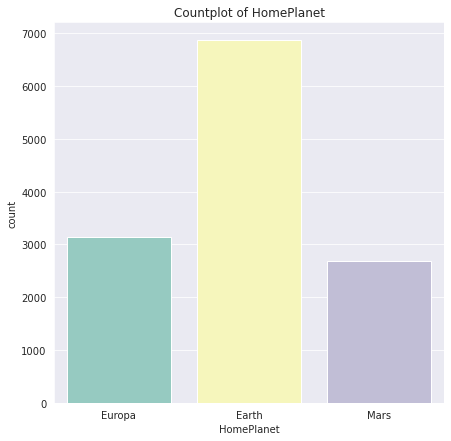

In [17]:
plt.figure(figsize = [7,7])

sns.set_palette('Set3')
sns.set_style("darkgrid")


sns.countplot(data = df,
              x = 'HomePlanet')
plt.title('Countplot of HomePlanet')

df['HomePlanet'] = df['HomePlanet'].fillna('Earth')

df.isna().sum()

Text(0.5, 1.0, 'Countplot of Destination')

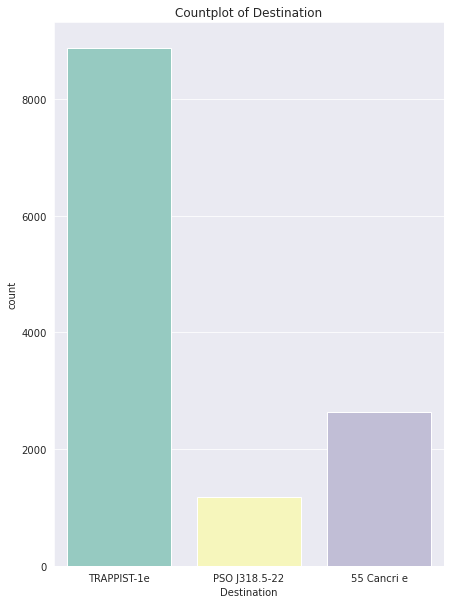

In [18]:
plt.figure(figsize = [7,10])

sns.countplot(data = df,
              x = 'Destination')
plt.title('Countplot of Destination')

In [19]:
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')

df.isna().sum()

HomePlanet         0
CryoSleep        310
Destination        0
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
cabin            299
side             299
FamilySize         0
dtype: int64

HomePlanet         0
CryoSleep        310
Destination        0
Age              270
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
cabin            299
side             299
FamilySize         0
dtype: int64

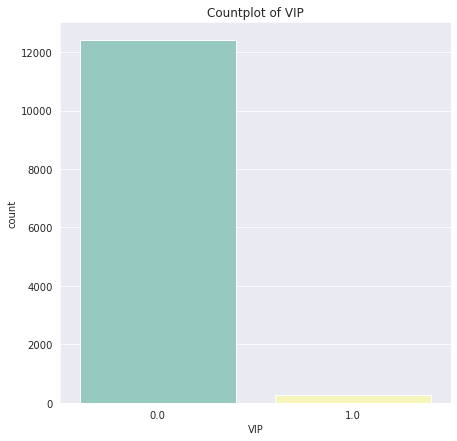

In [20]:
plt.figure(figsize = [7,7])
sns.countplot(data = df,
              x = 'VIP')
plt.title('Countplot of VIP')

df['VIP'] = df['VIP'].fillna(0)

df.isna().sum()

### To fill in the missing age value, I will fill it with VIP status. I think VIPs will be a good standard because there are many relatively old people.


### I want to fill the missing value with VIP status, should I fill it with average or median?

### Let's look at it as a probability density function.

Text(0.5, 1.0, 'Kdeplot of Age according to VIP')

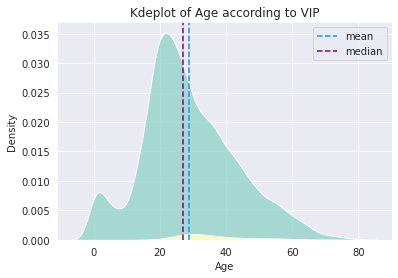

In [21]:
sns.kdeplot(data = df,
            x = 'Age',
            hue = 'VIP',
            multiple = 'stack')
plt.axvline(x = df['Age'].mean(), ls = '--', c = 'dodgerblue', label = 'mean')
plt.axvline(x = df['Age'].median(), ls = '--', c = 'purple', label = 'median')
plt.legend()
plt.title('Kdeplot of Age according to VIP')

### Looking at the probability density function, the median seems to explain the sample better.

### So let's deal with missing values based on the median.

Text(0.5, 1.0, 'median age according to VIP presence')

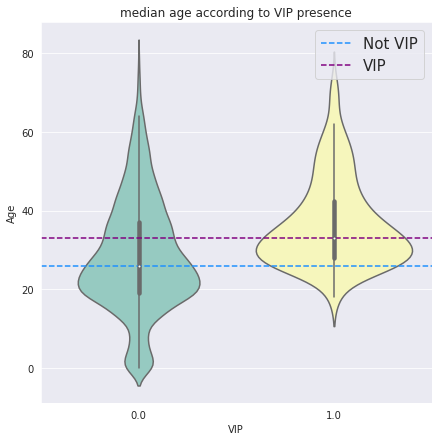

In [22]:
plt.figure(figsize = [7,7])
sns.violinplot(data = df,
            x = 'VIP',
            y = 'Age')
plt.axhline(y = df.loc[df['VIP'] == 0]['Age'].median(), ls = '--', c = 'dodgerblue', label = 'Not VIP')
plt.axhline(y = df.loc[df['VIP'] == 1]['Age'].median(), ls = '--', c = 'purple', label = 'VIP')
plt.legend(prop ={'size' : 15})
plt.title('median age according to VIP presence')

### Certainly, the average age is higher than that of non-VIP customers.

### Let's fill in the missing values differently depending on the VIP status.

In [23]:
df.loc[df['VIP'] ==0 , 'Age'] = df.loc[df['VIP'] ==0 , 'Age'].fillna(df.loc[df['VIP'] ==0 , 'Age'].median())
df.loc[df['VIP'] ==1 , 'Age'] = df.loc[df['VIP'] ==1 , 'Age'].fillna(df.loc[df['VIP'] ==1 , 'Age'].median())

df.isna().sum()

HomePlanet         0
CryoSleep        310
Destination        0
Age                0
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
cabin            299
side             299
FamilySize         0
dtype: int64

### In the same sense, the price of service use will be filled according to the missing value whether it is a VIP or not.

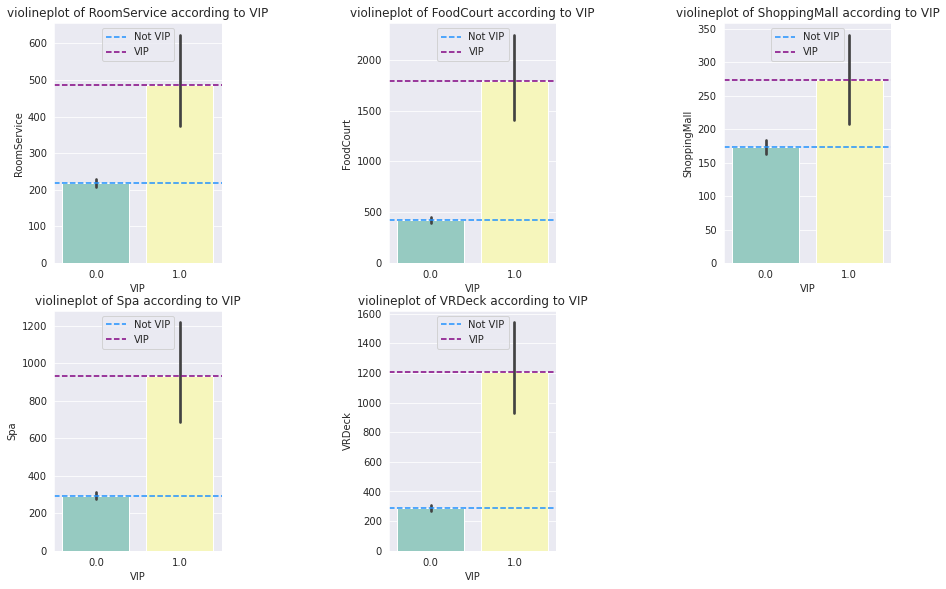

In [24]:
 numeric_cols = [
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']
    
plt.figure(figsize = [15,15])
plt.subplots_adjust(wspace = 1)

for i,var in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.barplot(data = df,
                x = 'VIP',
                y = var)
    plt.axhline(y = df.loc[df['VIP'] == 0][var].mean(), ls = '--', c = 'dodgerblue', label = 'Not VIP')
    plt.axhline(y = df.loc[df['VIP'] == 1][var].mean(), ls = '--', c = 'purple', label = 'VIP')
    plt.legend(loc = 9)
    plt.title(f'violineplot of {var} according to VIP')

### Since it means the price, the missing value was filled using the average value.

### People who are VIPs in every way paid more.

In [25]:
for var in numeric_cols:

    df.loc[df['VIP'] == 0,var] = df.loc[df['VIP'] == 0, var].fillna(df.loc[df['VIP'] == 0,var].mean())
    df.loc[df['VIP'] == 1,var] = df.loc[df['VIP'] == 1, var].fillna(df.loc[df['VIP'] == 1,var].mean())


df.isna().sum()

HomePlanet         0
CryoSleep        310
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
cabin            299
side             299
FamilySize         0
dtype: int64

### Let's checek CryoSleep

Text(0.5, 1.0, 'Countplot of CyroSleep according to VIP')

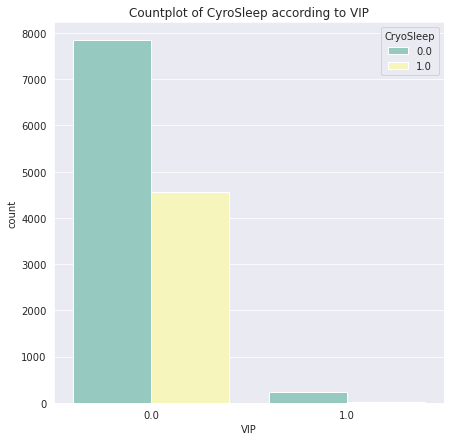

In [26]:
plt.figure(figsize = [7,7])
sns.countplot(data = df,
              x = 'VIP',
              hue = 'CryoSleep')
plt.title('Countplot of CyroSleep according to VIP')

### Most passengers did not apply for CyroSleep.

### Therefore, I will fill in the missing values for the non-application.

In [27]:
df['CryoSleep'] = df['CryoSleep'].fillna(0)

df.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
cabin            299
side             299
FamilySize         0
dtype: int64

### Filling Missing Values for Seats

<Figure size 432x288 with 0 Axes>

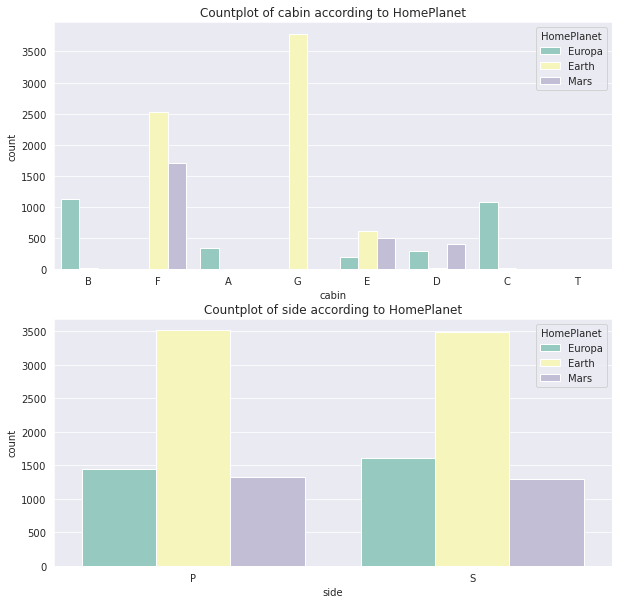

In [28]:
obj_cols = ['cabin','side']

plt.subplots_adjust(hspace = 1)

plt.figure(figsize = [10,10])
for i,var in enumerate(obj_cols):
    plt.subplot(2,1,i+1)
    
    sns.countplot(data = df,
                  x = var,
                  hue = 'HomePlanet')
    plt.title(f'Countplot of {var} according to HomePlanet')
    

### I will use the seat information according to the starting station.

### Most passengers departing from Earth used seats G.

### Most passengers departing from Europa used B seats.

### Most passengers departing from Mars used seats F.

### The seating position is 50:50, so I'll divide it into half and fill in the missing values.

In [29]:
na_cond = df['cabin'].isna()

df.loc[na_cond & (df['HomePlanet'] == 'Earth'),'cabin'] = df[na_cond & (df['HomePlanet'] == 'Earth')].fillna('G')
df.loc[na_cond & (df['HomePlanet'] == 'Europa'),'cabin'] = df[na_cond & (df['HomePlanet'] == 'Europa')].fillna('B') 
df.loc[na_cond & (df['HomePlanet'] == 'Mars'),'cabin'] = df[na_cond & (df['HomePlanet'] == 'Mars')].fillna('F') 

df.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
cabin              0
side             299
FamilySize         0
dtype: int64

In [30]:
df.loc[(df['side'].isna()),'side'][:150] = df.loc[(df['side'].isna()),'side'][:150].fillna('P')
df.loc[(df['side'].isna()),'side'] = df.loc[(df['side'].isna()),'side'].fillna('S')

df.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
cabin              0
side               0
FamilySize         0
dtype: int64

### The name is unpredictable, so I'll fill it up with Unknown

In [31]:
df['Name'] = df['Name'].fillna('Unknown')

df.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
Transported     4277
cabin              0
side               0
FamilySize         0
dtype: int64

### I will categorize the names so that they are easy to visualize later.

In [32]:
name_count = df['Name'].value_counts()

Rare_name = name_count[(name_count.values < name_count.mean())].index.tolist()

uncommon_name = name_count[(name_count.mean() < name_count.values) & (name_count.values <= 8)].index.tolist()

common_name = name_count[(8 < name_count.values) & (name_count.index != 'Unknown')].index.tolist()

unknown_name = name_count[name_count.index == 'Unknown'].index.tolist()





In [33]:
df.loc[df['Name'].isin(common_name),'Name'] = 0
df.loc[df['Name'].isin(uncommon_name),'Name'] = 1
df.loc[df['Name'].isin(Rare_name),'Name'] = 2
df.loc[df['Name'].isin(unknown_name),'Name']= 3

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin,side,FamilySize
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,B,P,1
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,2,1.0,F,S,1
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,1,0.0,A,S,2
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,1,0.0,A,S,2
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,0,1.0,F,S,1


### Since the preprocessing of the data is over, I will hand out the training set and the test set.

In [34]:
df['passenger_id'] = full_index
test = df.loc[df['passenger_id'].isin(submission_id)].drop('passenger_id', axis = 1 )
train = df.drop(index = test.index, axis = 0).drop('passenger_id',axis = 1)

# EDA

## proceed with data visualization depending on whether it is transmitted or not.

### Age group comparison by transmission or not.

### There is not much difference.

Text(0.5, 1.0, 'Kdeplot of Age according to Transported')

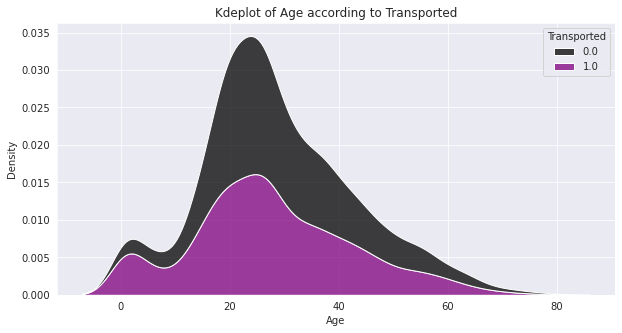

In [35]:
plt.figure(figsize = [10,5])
sns.kdeplot(data = train,
            x = 'Age',
            hue = 'Transported',
            palette = ['black','purple'],
            multiple = 'stack')
plt.title('Kdeplot of Age according to Transported')

### Visualization of 'HomePlanet', 'Destination', 'cabin', 'side', 'FamilySize', 'Name' data based on whether it has been transported or not

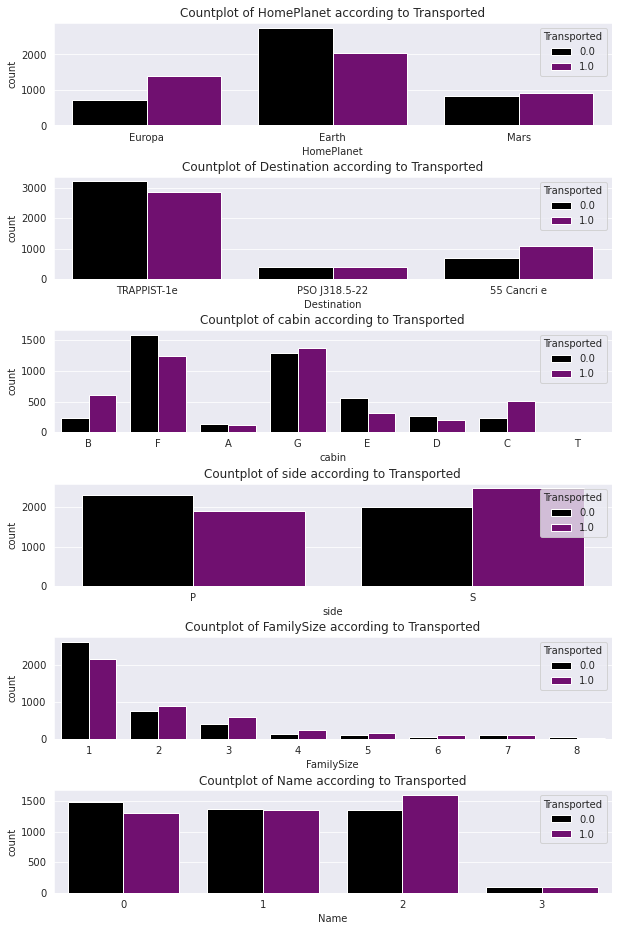

In [36]:
obj_cols = ['HomePlanet','Destination','cabin','side','FamilySize','Name']

plt.figure(figsize = [10,16])
plt.subplots_adjust(hspace = 0.5)
for i,var in enumerate(obj_cols):
    
    plt.subplot(6,1,i+1)
    
    sns.countplot(data = train,
                  x = var,
                  hue = 'Transported',
                  palette = ['black','purple'])
    plt.title(f'Countplot of {var} according to Transported')
    

### Visualization of numerical variables

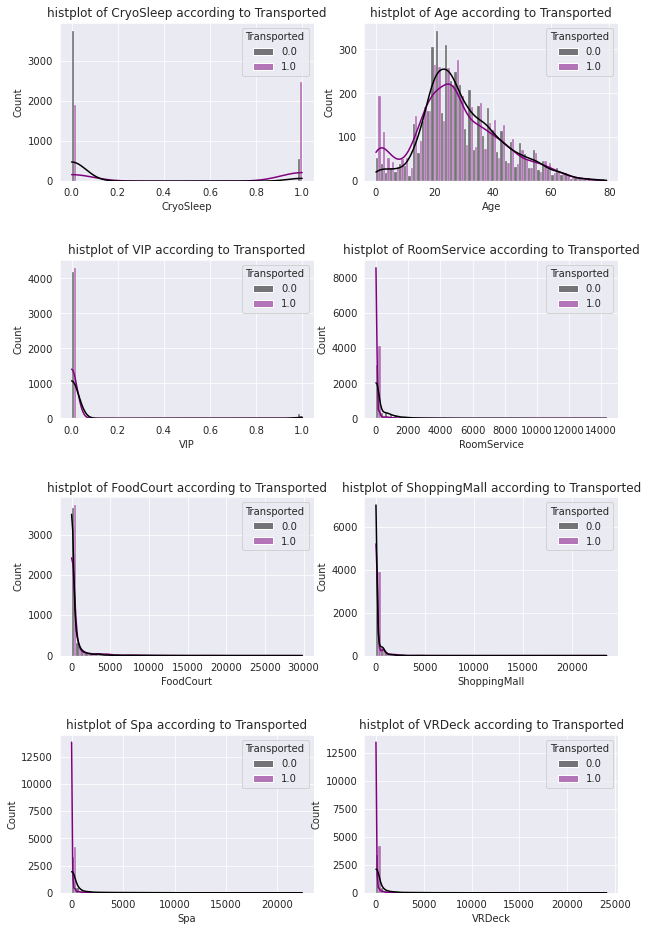

In [37]:
numeric_cols = ['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

numeric_cols

plt.figure(figsize = [10,16])
plt.subplots_adjust(hspace = 0.5)
for i,var in enumerate(numeric_cols):
    
    plt.subplot(4,2,i+1)
    
    sns.histplot(data = train,
                  x = var,
                  hue = 'Transported',
                  palette = ['black','purple'],
                  kde = True,
                  multiple = 'dodge',
                  bins = 50)
    plt.title(f'histplot of {var} according to Transported')

### There is no significant difference between the two groups.

# Modeling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

### Modeling will be carried out using decision trees.

### I wrote the code with the goal of finding the optimal number of roots.Because I haven't studied Random Forest yet :(

In [39]:
def encoder(df):
    
    obj_cols = df.describe(include = 'O').columns.tolist()

    for i,var in enumerate(obj_cols):

        dummy = df[var].unique()
        num = list(range(len(dummy)))

        for _ in range(len(dummy)):

            df.loc[df[var] == dummy[_],var] = num[_]

    return df


### object columns encoding 

In [40]:
train = encoder(train)
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin,side,FamilySize
0,0,0.0,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0,0,1
1,1,0.0,0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,2,1.0,1,1,1
2,0,0.0,0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,1,0.0,2,1,2
3,0,0.0,0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,1,0.0,2,1,2
4,1,0.0,0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,2,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.0,2,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,2,0.0,2,0,1
8689,1,1.0,1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,3,1,1
8690,1,0.0,0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1,1.0,3,1,1
8691,0,0.0,2,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,1,0.0,4,1,2


### After dividing into 10 validation sets, the test was repeated until the depth reached 20.

### As a result, 10 * 20, a total of 200 tests are conducted, and the optimal root depth is found by averaging the scores for each root depth.

In [41]:
cv = KFold(n_splits = 10)

max_depth = 20
avg_score = []

for depth in range(1,max_depth+1):
    
    score = []
    
    model = tree.DecisionTreeClassifier(max_depth = depth)
    
    for v_train,v_test in cv.split(train):
        
        v_train_feature = train.iloc[v_train].drop('Transported',axis = 1)
        v_train_target = train.iloc[v_train]['Transported']
        
        v_test_feature = train.iloc[v_test].drop('Transported',axis = 1)
        v_test_target = train.iloc[v_test]['Transported']
        
        model.fit(v_train_feature,v_train_target)
        
        predict = model.predict(v_test_feature)
        
        score.append(accuracy_score(v_test_target,predict))
        
    avg_score.append (sum(score) / len(score))
    

avg_score

[0.7182789042762854,
 0.7182789042762854,
 0.7090799306905811,
 0.7655684298242134,
 0.7714347314260016,
 0.7776451992645794,
 0.7717763845350053,
 0.7768378238958772,
 0.7777570995859954,
 0.7793686758461965,
 0.7764907477216513,
 0.7744215176646431,
 0.7685546869833209,
 0.7647613189952779,
 0.7610791899792336,
 0.7547513987540178,
 0.7508395169503856,
 0.7498018597145617,
 0.7450869674483817,
 0.7388730605928336]

### In the current list, each row is the average score for 10 tests when the root depth is n.

Text(0.5, 1.0, 'Best Depth is 9\n score : max(avg_score)')

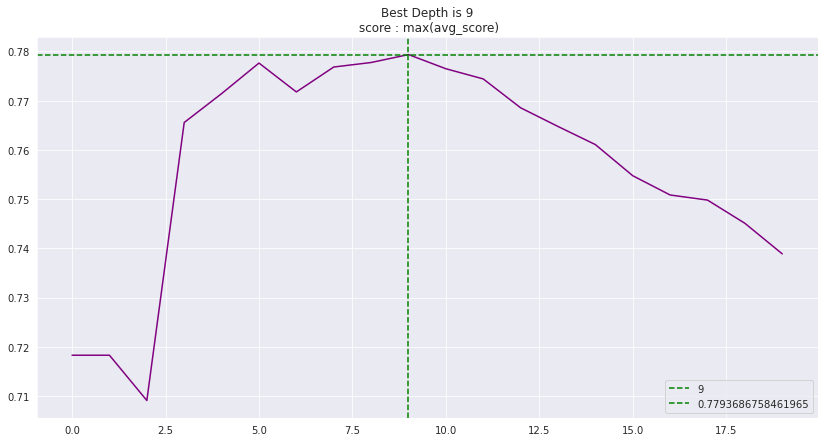

In [42]:
plt.figure(figsize = [14,7])
plt.plot(avg_score, c = 'purple')
plt.axvline(x = avg_score.index(max(avg_score)), label = avg_score.index(max(avg_score)), c = 'green', ls = '--')
plt.axhline(y = max(avg_score), label = max(avg_score), c = 'green', ls = '--')
plt.legend()
plt.title(f'Best Depth is {avg_score.index(max(avg_score))}\n score : max(avg_score)')

### As a result of the training set, the optimal root depth was found to be 9.

# Validate on test set

In [43]:
test = encoder(test)

In [44]:
model = tree.DecisionTreeClassifier(max_depth = 9)

model.fit(train.drop('Transported', axis = 1),train['Transported'])


predicted_value = model.predict(test.drop('Transported',axis = 1))


sample_submission['Transported'] = predicted_value

sample_submission['Transported'] = sample_submission['Transported'].map({1 : True,
                                                                  0 : False})



Text(0.5, 1.0, 'Prediction distribution')

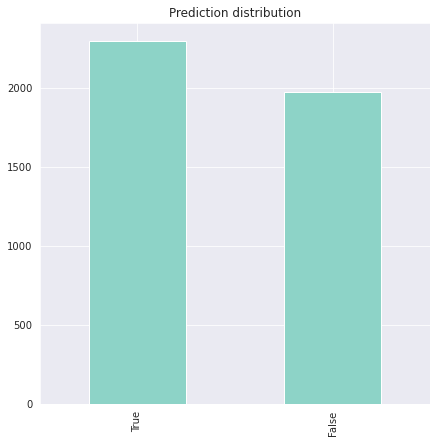

In [45]:
plt.figure(figsize = [7,7])
sample_submission['Transported'].value_counts().plot(kind = 'bar')
plt.title('Prediction distribution')

In [46]:
sample_submission.to_csv('submission.csv',index = False)
sample_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False
